In [58]:
import numpy as np
import xarray as xr
import os.path as op
import scipy.interpolate as intp
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
ddir = '/swot/SUM05/takaya/WOA'

In [60]:
url = ['https://data.nodc.noaa.gov/thredds/dodsC/woa/WOA13/DATA/nitrate/netcdf/all/5deg/woa13_all_p01_5d.nc',
      'https://data.nodc.noaa.gov/thredds/dodsC/woa/WOA13/DATA/nitrate/netcdf/all/5deg/woa13_all_p02_5d.nc',
      'https://data.nodc.noaa.gov/thredds/dodsC/woa/WOA13/DATA/nitrate/netcdf/all/5deg/woa13_all_p03_5d.nc',
      'https://data.nodc.noaa.gov/thredds/dodsC/woa/WOA13/DATA/nitrate/netcdf/all/5deg/woa13_all_p04_5d.nc',
      'https://data.nodc.noaa.gov/thredds/dodsC/woa/WOA13/DATA/phosphate/netcdf/all/5deg/woa13_all_p05_5d.nc',
      'https://data.nodc.noaa.gov/thredds/dodsC/woa/WOA13/DATA/phosphate/netcdf/all/5deg/woa13_all_p06_5d.nc',
      'https://data.nodc.noaa.gov/thredds/dodsC/woa/WOA13/DATA/phosphate/netcdf/all/5deg/woa13_all_p07_5d.nc',
      'https://data.nodc.noaa.gov/thredds/dodsC/woa/WOA13/DATA/phosphate/netcdf/all/5deg/woa13_all_p08_5d.nc',
      'https://data.nodc.noaa.gov/thredds/dodsC/woa/WOA13/DATA/phosphate/netcdf/all/5deg/woa13_all_p09_5d.nc',
      'https://data.nodc.noaa.gov/thredds/dodsC/woa/WOA13/DATA/phosphate/netcdf/all/5deg/woa13_all_p10_5d.nc',
      'https://data.nodc.noaa.gov/thredds/dodsC/woa/WOA13/DATA/phosphate/netcdf/all/5deg/woa13_all_p11_5d.nc',
      'https://data.nodc.noaa.gov/thredds/dodsC/woa/WOA13/DATA/phosphate/netcdf/all/5deg/woa13_all_p12_5d.nc',
      'https://data.nodc.noaa.gov/thredds/dodsC/woa/WOA13/DATA/phosphate/netcdf/all/5deg/woa13_all_p13_5d.nc',
      'https://data.nodc.noaa.gov/thredds/dodsC/woa/WOA13/DATA/phosphate/netcdf/all/5deg/woa13_all_p14_5d.nc',
      'https://data.nodc.noaa.gov/thredds/dodsC/woa/WOA13/DATA/phosphate/netcdf/all/5deg/woa13_all_p15_5d.nc',
      'https://data.nodc.noaa.gov/thredds/dodsC/woa/WOA13/DATA/phosphate/netcdf/all/5deg/woa13_all_p16_5d.nc'
      ]
print(url)

['https://data.nodc.noaa.gov/thredds/dodsC/woa/WOA13/DATA/nitrate/netcdf/all/5deg/woa13_all_p01_5d.nc', 'https://data.nodc.noaa.gov/thredds/dodsC/woa/WOA13/DATA/nitrate/netcdf/all/5deg/woa13_all_p02_5d.nc', 'https://data.nodc.noaa.gov/thredds/dodsC/woa/WOA13/DATA/nitrate/netcdf/all/5deg/woa13_all_p03_5d.nc', 'https://data.nodc.noaa.gov/thredds/dodsC/woa/WOA13/DATA/nitrate/netcdf/all/5deg/woa13_all_p04_5d.nc', 'https://data.nodc.noaa.gov/thredds/dodsC/woa/WOA13/DATA/phosphate/netcdf/all/5deg/woa13_all_p05_5d.nc', 'https://data.nodc.noaa.gov/thredds/dodsC/woa/WOA13/DATA/phosphate/netcdf/all/5deg/woa13_all_p06_5d.nc', 'https://data.nodc.noaa.gov/thredds/dodsC/woa/WOA13/DATA/phosphate/netcdf/all/5deg/woa13_all_p07_5d.nc', 'https://data.nodc.noaa.gov/thredds/dodsC/woa/WOA13/DATA/phosphate/netcdf/all/5deg/woa13_all_p08_5d.nc', 'https://data.nodc.noaa.gov/thredds/dodsC/woa/WOA13/DATA/phosphate/netcdf/all/5deg/woa13_all_p09_5d.nc', 'https://data.nodc.noaa.gov/thredds/dodsC/woa/WOA13/DATA/phosp

In [67]:
ds = xr.open_dataset('https://data.nodc.noaa.gov/thredds/dodsC/woa/WOA13/DATA/phosphate/netcdf/all/5deg/woa13_all_p01_5d.nc', 
                     decode_times=False)
ds

<xarray.Dataset>
Dimensions:             (depth: 43, lat: 36, lon: 72, nbounds: 2, time: 1)
Coordinates:
  * lat                 (lat) float32 -87.5 -82.5 -77.5 -72.5 -67.5 -62.5 ...
  * lon                 (lon) float32 -177.5 -172.5 -167.5 -162.5 -157.5 ...
  * depth               (depth) float32 0.0 5.0 10.0 15.0 20.0 25.0 30.0 ...
  * time                (time) float32 0.5
Dimensions without coordinates: nbounds
Data variables:
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    p_mn                (time, depth, lat, lon) float64 ...
    p_dd                (time, depth, lat, lon) float64 ...
    p_sd                (time, depth, lat, lon) float64 ...
    p_se                (time, depth, lat, lon) float64 ...
Attributes:
    standard_name_vocabulary:      CF-1.6
    featureType:             

In [62]:
ds = xr.open_dataset(url[0], decode_times=False)
po4_500 = ds.p_an[0]
ds = xr.open_dataset(url[1], decode_times=False)
po4_501 = ds.p_an[0]
ds = xr.open_dataset(url[2], decode_times=False)
po4_502 = ds.p_an[0]
ds = xr.open_dataset(url[3], decode_times=False)
po4_503 = ds.p_an[0]
ds = xr.open_dataset(url[4], decode_times=False)
po4_504 = ds.p_an[0]
ds = xr.open_dataset(url[5], decode_times=False)
po4_505 = ds.p_an[0]
ds = xr.open_dataset(url[6], decode_times=False)
po4_506 = ds.p_an[0]
ds = xr.open_dataset(url[7], decode_times=False)
po4_507 = ds.p_an[0]

OSError: [Errno -90] NetCDF: file not found: b'https://data.nodc.noaa.gov/thredds/dodsC/woa/WOA13/DATA/nitrate/netcdf/all/5deg/woa13_all_p01_5d.nc'

In [57]:
ds = xr.open_dataset(url[8], decode_times=False)
po4_508 = ds.p_an[0]

AttributeError: 'Dataset' object has no attribute 'p_an'

In [17]:
ds = xr.open_dataset(url[9], decode_times=False)
po4_509 = ds.p_an[0]
ds = xr.open_dataset(url[10], decode_times=False)
po4_510 = ds.p_an[0]
ds = xr.open_dataset(url[11], decode_times=False)
po4_511 = ds.p_an[0]
# ds = xr.open_dataset(url[12], decode_times=False)
# po4_512 = ds.p_mn[0]
# ds = xr.open_dataset(url[13], decode_times=False)
# po4_513 = ds.p_mn[0]
# ds = xr.open_dataset(url[14], decode_times=False)
# po4_514 = ds.p_mn[0]
# ds = xr.open_dataset(url[15], decode_times=False)
# po4_515 = ds.p_mn[0]
    
po4_511

<xarray.DataArray 'p_mn' (depth: 43, lat: 36, lon: 72)>
[111456 values with dtype=float64]
Coordinates:
  * lat      (lat) float32 -87.5 -82.5 -77.5 -72.5 -67.5 -62.5 -57.5 -52.5 ...
  * lon      (lon) float32 -177.5 -172.5 -167.5 -162.5 -157.5 -152.5 -147.5 ...
  * depth    (depth) float32 0.0 5.0 10.0 15.0 20.0 25.0 30.0 35.0 40.0 45.0 ...
    time     float32 11.5
Attributes:
    standard_name:  moles_concentration_of_phosphate_in_sea_water
    long_name:      Average of all unflagged interpolated values at each stan...
    cell_methods:   area: mean depth: mean time: mean
    grid_mapping:   crs
    units:          micromoles_per_liter

In [12]:
ds

<xarray.Dataset>
Dimensions:  (depth: 43, lat: 36, lon: 72, month: 16)
Coordinates:
  * month    (month) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
  * depth    (depth) float32 0.0 5.0 10.0 15.0 20.0 25.0 30.0 35.0 40.0 45.0 ...
  * lat      (lat) float32 -87.5 -82.5 -77.5 -72.5 -67.5 -62.5 -57.5 -52.5 ...
  * lon      (lon) float32 -177.5 -172.5 -167.5 -162.5 -157.5 -152.5 -147.5 ...
Data variables:
    PO4      (month, depth, lat, lon) float64 nan nan nan nan nan nan nan ...

In [18]:
po4_5 = xr.DataArray(np.zeros((12,43,36,72)), dims=['month','depth','lat','lon'],
                     coords={'month':range(1,13),'depth':ds.depth.data,
                            'lat':ds.lat.data,'lon':ds.lon.data})

po4_5[0] = po4_500.data
po4_5[1] = po4_501.data
po4_5[2] = po4_502.data
po4_5[3] = po4_503.data
po4_5[4] = po4_504.data
po4_5[5] = po4_505.data
po4_5[6] = po4_506.data
po4_5[7] = po4_507.data
po4_5[8] = po4_508.data
po4_5[9] = po4_509.data
po4_5[10] = po4_510.data
po4_5[11] = po4_511.data

In [19]:
po4_5.attrs['unit'] = 'mmol P m-3'
ds = po4_5.to_dataset(name='PO4')
ds.to_netcdf(op.join(ddir,'WOA_phosphate-5deg.nc'))
ds

<xarray.Dataset>
Dimensions:  (depth: 43, lat: 36, lon: 72, month: 12)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * depth    (depth) float32 0.0 5.0 10.0 15.0 20.0 25.0 30.0 35.0 40.0 45.0 ...
  * lat      (lat) float32 -87.5 -82.5 -77.5 -72.5 -67.5 -62.5 -57.5 -52.5 ...
  * lon      (lon) float32 -177.5 -172.5 -167.5 -162.5 -157.5 -152.5 -147.5 ...
Data variables:
    PO4      (month, depth, lat, lon) float64 nan nan nan nan nan nan nan ...

In [22]:
ds = xr.open_dataset(op.join(ddir,'WOA_silicate-5deg.nc'))
sio2 = ds.SiO2
ds = xr.open_dataset(op.join(ddir,'WOA_nitrate-5deg.nc'))
no3 = ds.NO3
ds = xr.open_dataset(op.join(ddir,'WOA_phosphate-5deg.nc'))
po4 = ds.PO4

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


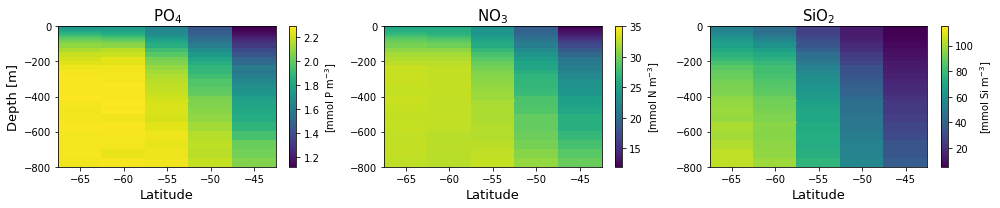

In [37]:
fig, (ax1,ax2,ax3) = plt.subplots(figsize=(14,3), nrows=1, ncols=3)
fig.set_tight_layout(True)

im1 = ax1.pcolormesh(po4.sel(lat=slice(-70,-40)).lat, -po4.depth, 
                    po4.sel(lat=slice(-70,-40)).mean(['month','lon']),
                    rasterized=True)
im2 = ax2.pcolormesh(no3.sel(lat=slice(-70,-40)).lat, -no3.depth, 
                    no3.sel(lat=slice(-70,-40)).mean(['month','lon']),
                    vmax=35., rasterized=True)
im3 = ax3.pcolormesh(sio2.sel(lat=slice(-70,-40)).lat, -sio2.depth, 
                    sio2.sel(lat=slice(-70,-40)).mean(['month','lon']),
                    vmax=115., rasterized=True)

ax1.set_ylabel(r'Depth [m]', fontsize=13)
ax1.set_xlabel(r'Latitude', fontsize=13)
ax2.set_xlabel(r'Latitude', fontsize=13)
ax3.set_xlabel(r'Latitude', fontsize=13)

ax1.set_title(r'PO$_4$', fontsize=15)
ax2.set_title(r'NO$_3$', fontsize=15)
ax3.set_title(r'SiO$_2$', fontsize=15)

cbar1 = fig.colorbar(im1, ax=ax1)
cbar2 = fig.colorbar(im2, ax=ax2)
cbar3 = fig.colorbar(im3, ax=ax3)

cbar1.set_label(r'[mmol P m$^{-3}$]')
cbar2.set_label(r'[mmol N m$^{-3}$]')
cbar3.set_label(r'[mmol Si m$^{-3}$]')

plt.savefig(op.join(ddir,'WOA-SO-zonaltransect.pdf'))

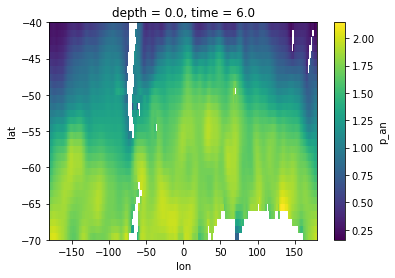

In [52]:
ds = xr.open_dataset(op.join(ddir,'phos/1deg/woa13_all_p00_01.nc'), decode_times=False)
po4_SOclim = ds.p_an[0].sel(lat=slice(-70,-40))
ds = xr.open_dataset(op.join(ddir,'nitr/1deg/woa13_all_n00_01.nc'), decode_times=False)
no3_SOclim = ds.n_an[0].sel(lat=slice(-70,-40))
ds = xr.open_dataset(op.join(ddir,'sili/1deg/woa13_all_i00_01.nc'), decode_times=False)
sio2_SOclim = ds.i_an[0].sel(lat=slice(-70,-40))
po4_SOclim[0].plot()

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


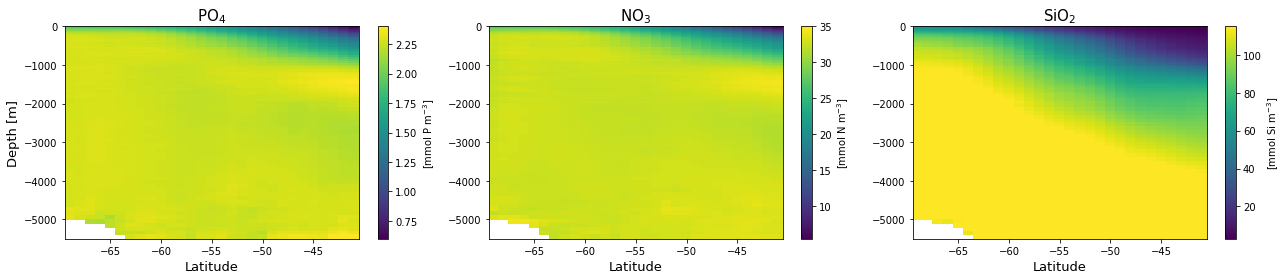

In [65]:
fig, (ax1,ax2,ax3) = plt.subplots(figsize=(18,4), nrows=1, ncols=3)
fig.set_tight_layout(True)

im1 = ax1.pcolormesh(po4_SOclim.lat, -po4_SOclim.depth, 
                    po4_SOclim.mean(['lon']),
                    rasterized=True)
im2 = ax2.pcolormesh(no3_SOclim.lat, -no3_SOclim.depth, 
                    no3_SOclim.mean(['lon']),
                    vmax=35., rasterized=True)
im3 = ax3.pcolormesh(sio2_SOclim.lat, -sio2_SOclim.depth, 
                    sio2_SOclim.mean(['lon']),
                    vmax=115., rasterized=True)

ax1.set_ylabel(r'Depth [m]', fontsize=13)
ax1.set_xlabel(r'Latitude', fontsize=13)
ax2.set_xlabel(r'Latitude', fontsize=13)
ax3.set_xlabel(r'Latitude', fontsize=13)

ax1.set_title(r'PO$_4$', fontsize=15)
ax2.set_title(r'NO$_3$', fontsize=15)
ax3.set_title(r'SiO$_2$', fontsize=15)

cbar1 = fig.colorbar(im1, ax=ax1)
cbar2 = fig.colorbar(im2, ax=ax2)
cbar3 = fig.colorbar(im3, ax=ax3)

cbar1.set_label(r'[mmol P m$^{-3}$]')
cbar2.set_label(r'[mmol N m$^{-3}$]')
cbar3.set_label(r'[mmol Si m$^{-3}$]')

plt.savefig(op.join(ddir,'WOA-SO-climatologicalzonaltransect.pdf'))